In [1]:
# Demo of how MC simulation works in Python

In [2]:
import numpy as np
import os
import math
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statistics
from statistics import NormalDist
from scipy.stats import qmc

# One can simulate a sample from any distribution using a sample of uniform[0,1] distribution
# using pseudo number generator (Mersenne Twiseter)
np.random.seed(10)
sample_size = 1000000
uniform_sample = np.random.uniform(size=sample_size)





In [3]:
# Example 1: the discrete distribution describing the outcoming of rolling a fairdice

dice_sample = [ int(u/(1/6))+1    for u in uniform_sample]
num1 = sum(1 for o in dice_sample if o==1)
num2 = sum(1 for o in dice_sample if o==2)
num3 = sum(1 for o in dice_sample if o==3)
num4 = sum(1 for o in dice_sample if o==4)
num5 = sum(1 for o in dice_sample if o==5)
num6 = sum(1 for o in dice_sample if o==6)

print("Percentage of outcome = 1: " + str(num1/sample_size))
print("Percentage of outcome = 2: " + str(num2/sample_size))
print("Percentage of outcome = 3: " + str(num3/sample_size))
print("Percentage of outcome = 4: " + str(num4/sample_size))
print("Percentage of outcome = 5: " + str(num5/sample_size))
print("Percentage of outcome = 6: " + str(num6/sample_size))

Percentage of outcome = 1: 0.16682
Percentage of outcome = 2: 0.166092
Percentage of outcome = 3: 0.166407
Percentage of outcome = 4: 0.166819
Percentage of outcome = 5: 0.167105
Percentage of outcome = 6: 0.166757


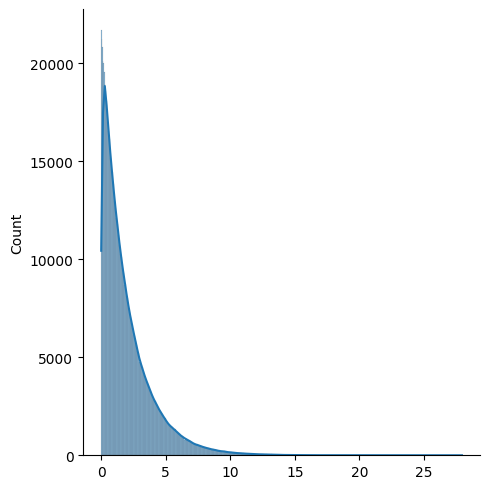

In [4]:
# Example 2: Exponential Distribution with parameter a = 0.5b
# An exponential distribution has CDF F(x) = 1 - exp(-a x) 
# From class, we know that a simulated exponential number e can be obtained 
# from a simulated uniform number u by setting e = F^-1(u)
# In this case, F(x) = 1 - exp(-a x). Hence, we have  F^-1(u) = ln(1-u)/(-a)


a = 0.5
exp_sample = [ math.log(u)/(-a)  for u in uniform_sample]
sns.displot(exp_sample, kde=True)

#Question: why do I use math.log(u)/(-a) instead of math.log(1-u)/(-a)? Does it matter?


Mean of the sample: 0.0008661576949628163
Standard deviation of the sample: 1.000191715776257


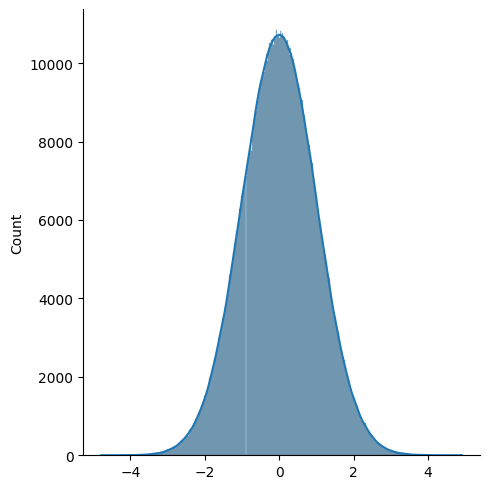

In [5]:
# Example 3: Standard Normal
# note that statistics.NormalDist.inv_cdf() is much faster than scipy.stats.norm.ppf() 

snorm_sample = [ NormalDist().inv_cdf(u)  for u in uniform_sample]
sns.displot(snorm_sample, kde=True)
print("Mean of the sample: " + str(statistics.mean(snorm_sample)))
print("Standard deviation of the sample: " + str(statistics.stdev(snorm_sample)))


In [6]:
# Example 3: correlated standard normal variables 
# If you want to simulate correlated normal variables with arbitrary mean and stdev, you can
# first simulate standard normal variables with the same correlations first then further map them into 
# the target normal variables by scaling it by the target stdev and then adding the target mean 


file_corr = "./data/sample-correlation-matrix.csv"
data_corr = pd.read_csv(file_corr,header=None)

print(data_corr)

factor_loadings = np.linalg.cholesky(data_corr)
uniforms = np.random.uniform(size=(100_000,10))

snorms = [ [NormalDist().inv_cdf(u) for u in r]  for r in uniforms]
snorms_correlated = np.dot(snorms, factor_loadings.transpose())

# test sample correlation 
i1 = 1
i2 = 9
s1 = [ r[i1] for r in snorms_correlated ]
s2 = [ r[i2] for r in snorms_correlated ]

print("Sample Correlation between s1 and s2: " + str(statistics.correlation(s1, s2)))


        0       1       2       3       4       5       6       7       8  \
0  1.0000  0.9756  0.9524  0.9304  0.9094  0.8894  0.8704  0.8523  0.8352   
1  0.9756  1.0000  0.9756  0.9524  0.9304  0.9094  0.8894  0.8704  0.8523   
2  0.9524  0.9756  1.0000  0.9756  0.9524  0.9304  0.9094  0.8894  0.8704   
3  0.9304  0.9524  0.9756  1.0000  0.9756  0.9524  0.9304  0.9094  0.8894   
4  0.9094  0.9304  0.9524  0.9756  1.0000  0.9756  0.9524  0.9304  0.9094   
5  0.8894  0.9094  0.9304  0.9524  0.9756  1.0000  0.9756  0.9524  0.9304   
6  0.8704  0.8894  0.9094  0.9304  0.9524  0.9756  1.0000  0.9756  0.9524   
7  0.8523  0.8704  0.8894  0.9094  0.9304  0.9524  0.9756  1.0000  0.9756   
8  0.8352  0.8523  0.8704  0.8894  0.9094  0.9304  0.9524  0.9756  1.0000   
9  0.8188  0.8352  0.8523  0.8704  0.8894  0.9094  0.9304  0.9524  0.9756   

        9  
0  0.8188  
1  0.8352  
2  0.8523  
3  0.8704  
4  0.8894  
5  0.9094  
6  0.9304  
7  0.9524  
8  0.9756  
9  1.0000  
Sample Correlation b

In [8]:
# Challenges:

# (Q1) Estimate the value of Pi() by simulation
# (Q2) Can you find a way to simulate correlated Exponential 
#     variables (you need not to consider specific correlation values)? 
#     Hints: a) use correlated standard normal as your starting point
#            b) use the fact NormalDist().cdf(Z) is uniform[0,1] if Z is standard Normal
